In [42]:
## Import Libraries

import pandas as pd
import numpy as np
import string
import re
import nltk
import imblearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV


from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.manifold import TSNE    

from imblearn.over_sampling import SMOTE

In [43]:
# load data
df_test = pd.read_csv('../data/processed/mtsamples_nlp.csv')
df_test.transcription=df_test.transcription.astype(str)

In [44]:
# retrieve labels as function
def get_labels(data):
    return data['medical_specialty'].tolist()

df_test_label = get_labels(df_test)
df_test_X = df_test['transcription_f'].astype(str)

In [45]:
# split data into train and test set (first split data into train and test set to only transform the train set)
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df_test_X, df_test_label)
X_train

1557    {'pulmonary', 'ventricular', 'left', 'valve', ...
509     {'skin', 'urethral', 'patient', 'corpus', 'bov...
2044    {'nucleus', 'corneal', 'smooth', 'edema', 'pat...
1847    {'needle', 'body', 'graft', 'c5c7,trimline', '...
2097    {'skin', 'edema', 'patient', 'cell', 'intraven...
                              ...                        
1638                            {'patient', 'bacitracin'}
1095    {'coronary', 'patient', 'snuffbox', 'intraveno...
1130    {'abdominal', 'cecum', 'transversalis', 'patie...
1294    {'scleral', 'optic', 'lid', 'sectoral', 'indoc...
860     {'x1,dose', 'patient', 'vancomycin', 'lithotri...
Name: transcription_f, Length: 2380, dtype: object

In [46]:
# vectorize df_test_X 
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

In [47]:
# smote oversampling
sm = SMOTE(random_state=42)
X_train_vec, y_train = sm.fit_resample(X_train_vec, y_train)
X_train_vec

<8921x2574 sparse matrix of type '<class 'numpy.int64'>'
	with 163353 stored elements in Compressed Sparse Row format>

In [48]:
# get feature names
feat = vectorizer.get_feature_names()
len(feat)

/Users/hannahpetry/opt/anaconda3/envs/nlp_masterthesis/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2574

In [55]:
lr = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga', max_iter=1000).fit(X_train_vec, y_train)

In [56]:
print(lr.coef_)
len(lr.coef_[0])

[[-1.43561893e-05 -7.04327218e-04  4.17241151e-01 ... -2.63416027e-03
  -2.61572851e-04 -6.67696284e-02]
 [-2.88187314e-02 -1.56686365e-04 -3.96545879e-01 ... -3.12268661e-03
  -3.88925003e-02  2.81028974e-01]
 [-5.53674311e-06 -9.95565944e-05 -1.22317729e-05 ... -6.24630273e-04
  -3.61176745e-04 -3.82257788e-02]
 ...
 [-9.95346443e-04 -1.66224313e-05  1.49674829e-01 ... -4.21871862e-05
  -3.79624747e-03 -1.52100961e-01]
 [-4.96729195e-03  3.90521017e-02 -4.22263196e-04 ...  6.21400008e-01
  -6.00990278e-04 -1.44042760e-02]
 [-1.50394853e-05 -2.62157636e-04  1.75215232e-03 ... -2.23751379e-04
  -7.50833764e-04 -8.32465714e-02]]


2574

In [57]:
lr.coef_.shape

(11, 2574)

In [80]:
# array to dataframe
coef_df = pd.DataFrame(lr.coef_, columns=feat, index=lr.classes_)
coef_df = coef_df.abs()
coef_df

,0007,005,01,0125,020,025,03,0395,05,050,...,zithromax,zocor,zofran,zoladex,zoloft,zometa,zone,zygoma,zygomatic,zyprexa
Cardiovascular / Pulmonary,0.000014,0.000704,0.417241,4.852642e-06,0.029673,0.048249,0.000043,0.000140,0.061810,0.000230,...,0.484058,0.320839,0.001733,0.000089,0.189057,0.000296,0.043677,0.002634,0.000262,0.066770
Consult - History and Phy.,0.028819,0.000157,0.396546,1.162737e-01,0.000001,0.027705,0.000777,0.324558,0.074425,0.001599,...,0.071422,0.570299,0.201178,0.007334,0.159728,0.098247,0.132916,0.003123,0.038893,0.281029
Gastroenterology,0.000006,0.000100,0.000012,6.543443e-05,0.000079,0.034500,0.000451,0.003479,0.033917,0.000074,...,0.011515,0.048431,0.180420,0.004135,0.038479,0.002175,0.018603,0.000625,0.000361,0.038226
General Medicine,0.000004,0.000014,0.140618,2.916331e-02,0.000012,0.047054,0.008323,0.003221,0.035610,0.000089,...,0.116335,0.071549,0.292481,0.000021,0.112280,0.032801,0.197806,0.000083,0.008061,0.087992
Neurology,0.361522,0.032976,0.000404,6.127213e-07,0.000449,0.089461,0.000002,0.022969,0.056554,0.000046,...,0.479507,0.162520,0.011434,0.000085,0.079888,0.000075,0.000024,0.473784,0.005603,0.361210
Obstetrics / Gynecology,0.000002,0.000167,0.000004,4.231289e-05,0.000035,0.093060,0.000004,0.006111,0.256421,0.000081,...,0.008419,0.001243,0.014701,0.000456,0.040449,0.007961,0.111604,0.000364,0.001532,0.043544
Orthopedic,0.278616,0.003198,0.012818,1.041212e-04,0.000261,0.036944,0.000003,0.060040,0.604129,0.059944,...,0.654480,0.339100,0.015708,0.000139,0.063220,0.000014,0.000666,0.127884,0.034822,0.056204
Radiology,0.117728,0.001458,0.017844,1.318807e-06,0.000004,0.162195,0.001658,0.025445,0.651179,0.000099,...,0.142879,0.086619,0.002061,0.000847,0.080413,0.002811,0.000276,0.012637,0.094681,0.099753
SOAP / Chart / Progress Notes,0.000995,0.000017,0.149675,7.820323e-02,0.000001,0.038913,0.011950,0.031163,0.345322,0.000008,...,0.459482,0.113093,0.071483,0.000060,0.573081,0.145100,0.136477,0.000042,0.003796,0.152101
Surgery,0.004967,0.039052,0.000422,8.687883e-03,0.030530,0.630763,0.000687,0.065517,0.366101,0.062205,...,0.053211,0.283892,0.005001,0.134015,0.004096,0.000570,0.019190,0.621400,0.000601,0.014404


In [98]:
# per row get column names with top 5 highest value
top_symptoms = coef_df.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
top_symptoms

 Cardiovascular / Pulmonary               [subclavian, lung, heart, tracheal, wall]
 Consult - History and Phy.                  [sugar, alcohol, cancer, joint, liver]
 Gastroenterology                     [esophagus, rectal, duodenum, abdomen, colon]
 General Medicine                             [nose, insulin, mucosa, naris, edema]
 Neurology                               [focal, beta, spindle, dilantin, lamictal]
 Obstetrics / Gynecology             [breast, vagina, placenta, uterus, peritoneum]
 Orthopedic                                  [cervical, joint, tendon, wound, foot]
 Radiology                        [fibroglandular, tumor, tissue, frontal, pancr...
 SOAP / Chart / Progress Notes    [adenocarcinoma, hydroxychloroquine, wall, prn...
 Surgery                                 [set, foreskin, biliary, rectal, duodenum]
 Urology                               [bladder, scrotal, inguinal, seminal, penis]
dtype: object

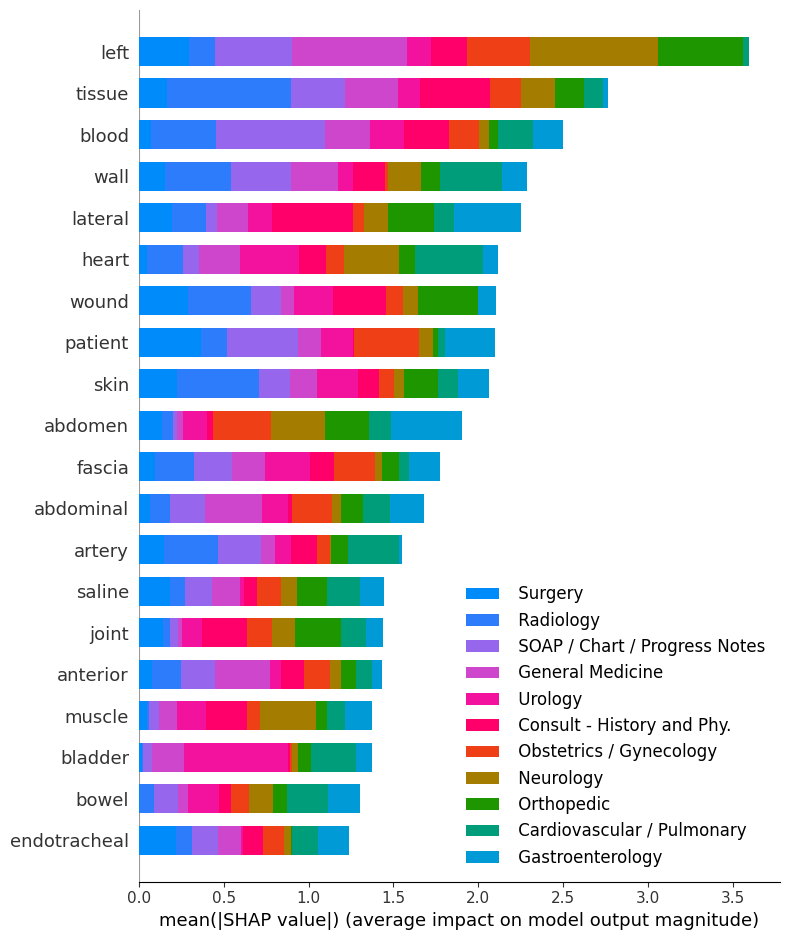

In [86]:
import shap
from pydoc import classname
# transform test data
X_test_vec = vectorizer.transform(X_test)
# explain the model's predictions using SHAP values
explainer = shap.LinearExplainer(lr, X_train_vec, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_vec)
shap.summary_plot(shap_values, X_test_vec, class_names= lr.classes_, feature_names=vectorizer.get_feature_names_out ())

In [89]:
import lime
from lime.lime_text import LimeTextExplainer

explainer = lime.lime_text.LimeTextExplainer(X_train_vec, class_names=lr.classes_)
# num features is the number of features to be shown
# top labels is the number of labels with the highest probability to be shown
exp = explainer.explain_instance(X_test_vec[4], lr.predict_proba, num_features=5, top_labels=2)
exp.show_in_notebook(show_table=True, show_all=False)

TypeError: expected string or bytes-like object